Accuracy for Logistic Regression model is 0.9636363636363636
Accuracy for Support Vector Classifier (SVC) model is 0.9681818181818181
Accuracy for K-Nearest Neighbors (KNN) model is 0.9659090909090909
Accuracy for Decision Tree model is 0.9840909090909091
Accuracy for Random Forest model is 0.9931818181818182
Accuracy for Gaussian Naive Bayes model is 0.9954545454545455
Accuracy for AdaBoost model is 0.14545454545454545
Accuracy for Bagging Classifier model is 0.9886363636363636
Accuracy for Extra Trees model is 0.9840909090909091
Accuracy for Gradient Boosting model is 0.9818181818181818
Accuracy for Gradient Boosting model is 0.9931818181818182


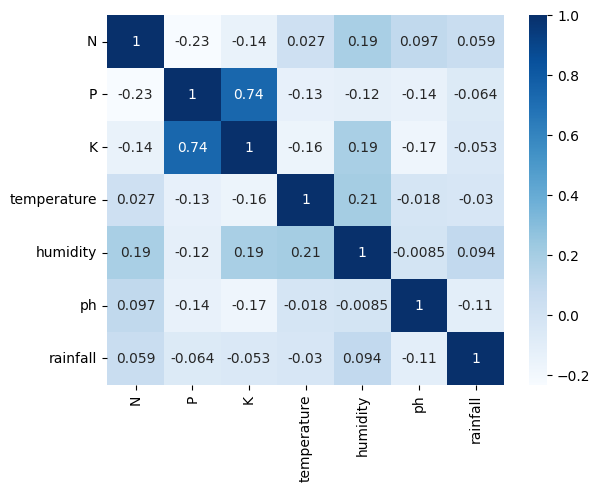

In [1]:
import pandas as pd
import seaborn as sns
crop = pd.read_csv("data_crop_recommendation.csv")
crop.head()
numeric_columns = crop.select_dtypes(include=['float64', 'int64']).columns
corr = crop[numeric_columns].corr()
sns.heatmap(corr,annot=True,cbar=True,cmap='Blues')

crop_dict={

    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange': 17,
    'papaya': 18,
    'coconut': 19,
    'cotton': 20,
    'jute': 21,
    'coffee': 22


}

crop['crop_num']=crop['label'].map(crop_dict)
crop['crop_num'].value_counts()
crop.drop('label',axis=1,inplace=True)
x=crop.drop('crop_num',axis=1)
y=crop['crop_num']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize all models with default parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier (SVC)": SVC(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
for name,md in models.items():
    md.fit(x_train,y_train)
    ypred=md.predict(x_test)
    print(f"Accuracy for {name} model is {accuracy_score(y_test,ypred)}")


    rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred=rfc.predict(x_test)
print(f"Accuracy for {name} model is {accuracy_score(y_test,ypred)}")


In [2]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd

In [4]:
import pandas as pd
crop = pd.read_csv("data_crop_recommendation.csv") 
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.shape

(2200, 8)

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
crop.duplicated().sum()

np.int64(0)

In [9]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
print(crop.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [11]:
numeric_columns = crop.select_dtypes(include=['float64', 'int64']).columns
corr = crop[numeric_columns].corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

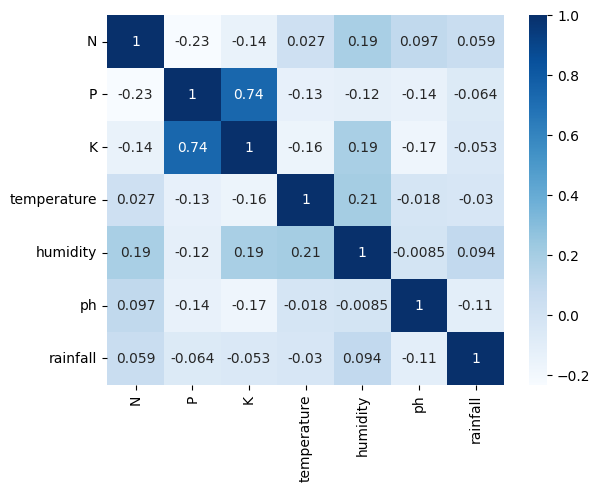

In [12]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='Blues')

In [13]:
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

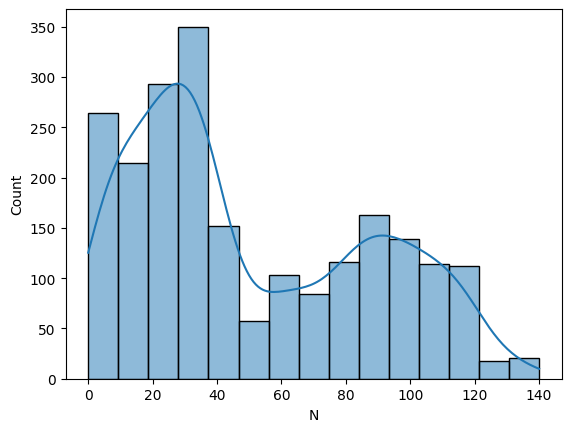

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(crop['N'], kde=True)
plt.show()


In [15]:
crop_dict={

    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange': 17,
    'papaya': 18,
    'coconut': 19,
    'cotton': 20,
    'jute': 21,
    'coffee': 22


}

crop['crop_num']=crop['label'].map(crop_dict)
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [16]:
crop.drop('label',axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [17]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [18]:
x=crop.drop('crop_num',axis=1)
y=crop['crop_num']
x.shape


(2200, 7)

In [19]:
y.shape

(2200,)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape

(1760, 7)

In [22]:
x_test.shape

(440, 7)

In [23]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]],
      shape=(1760, 7))

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize all models with default parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier (SVC)": SVC(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
for name,md in models.items():
    md.fit(x_train,y_train)
    ypred=md.predict(x_test)
    print(f"Accuracy for {name} model is {accuracy_score(y_test,ypred)}")


Accuracy for Logistic Regression model is 0.9636363636363636
Accuracy for Support Vector Classifier (SVC) model is 0.9681818181818181
Accuracy for K-Nearest Neighbors (KNN) model is 0.9659090909090909
Accuracy for Decision Tree model is 0.9886363636363636
Accuracy for Random Forest model is 0.9931818181818182
Accuracy for Gaussian Naive Bayes model is 0.9954545454545455
Accuracy for AdaBoost model is 0.14545454545454545
Accuracy for Bagging Classifier model is 0.9863636363636363
Accuracy for Extra Trees model is 0.9886363636363636
Accuracy for Gradient Boosting model is 0.9818181818181818


In [27]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred=rfc.predict(x_test)
print(f"Accuracy for {name} model is {accuracy_score(y_test,ypred)}")

Accuracy for Gradient Boosting model is 0.9931818181818182


In [28]:
def recommendation(N,p,k,temperature,humidity,ph,rainfall):
  features=np.array([[N,p,k,temperature,humidity,ph,rainfall]])
  prediction=rfc.predict(features).reshape(1,-1)
  return prediction[0]


In [30]:
import numpy as np  # Required for array operations
from sklearn.ensemble import RandomForestClassifier


N = 20
p = 30
k = 40
temperature = 40.0
humidity = 60.0
ph = 8.0
rainfall = 200.0

crop_dict = {
    1: "rice",
    2: "maize",
    3: "chickpea",
    4: "kidneybeans",
    5: "pigeonpeas",
    6: "mothbeans",
    7: "mungbean",
    8: "blackgram",
    9: "lentil",
    10: "pomegranate",
    11: "banana",
    12: "mango",
    13: "grapes",
    14: "watermelon",
    15: "muskmelon",
    16: "apple",
    17: "orange",
    18: "papaya",
    19: "coconut",
    20: "cotton",
    21: "jute",
    22: "coffee"
}

# Recommendation function
def recommendation(N, p, k, temperature, humidity, ph, rainfall):
    features = np.array([[N, p, k, temperature, humidity, ph, rainfall]])
    prediction = rfc.predict(features)  # Ensure `rfc` is trained
    return prediction[0]  # Return the predicted crop label

predict = recommendation(N, p, k, temperature, humidity, ph, rainfall)

# print result
if predict in crop_dict:
    crop = crop_dict[predict]
    print(f"{crop} is the best crop to be cultivated.")  # Fixed string formatting
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")

apple is the best crop to be cultivated.


In [31]:
import json

# Example: This should be the result your notebook calculates
recommendation_result = {
    "recommended_crop": "Maize",  # replace with your model's result
    "reason": "Suitable temperature and soil pH levels"
}

# Export to JSON file inside the 'output' folder
with open("output/crop_recommendation_result.json", "w") as file:
    json.dump(recommendation_result, file)

print("Crop recommendation exported successfully.")


Crop recommendation exported successfully.


In [32]:
import json
import os

# Example result (replace with your actual recommendation_result from your notebook)
recommendation_result = {
    "recommended_crop": "Maize",
    "reason": "Suitable temperature and soil pH levels"
}

# Create 'output' folder if it doesn't exist
os.makedirs("output", exist_ok=True)

# Save the result to a JSON file
with open("output/crop_recommendation_result.json", "w") as file:
    json.dump(recommendation_result, file)

print("Saved at:", os.path.abspath("output/crop_recommendation_result.json"))


Saved at: C:\Users\dnite\OneDrive\Desktop\MY PROJECT\Marketlink\Backend Algorithms\output\crop_recommendation_result.json
